        Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


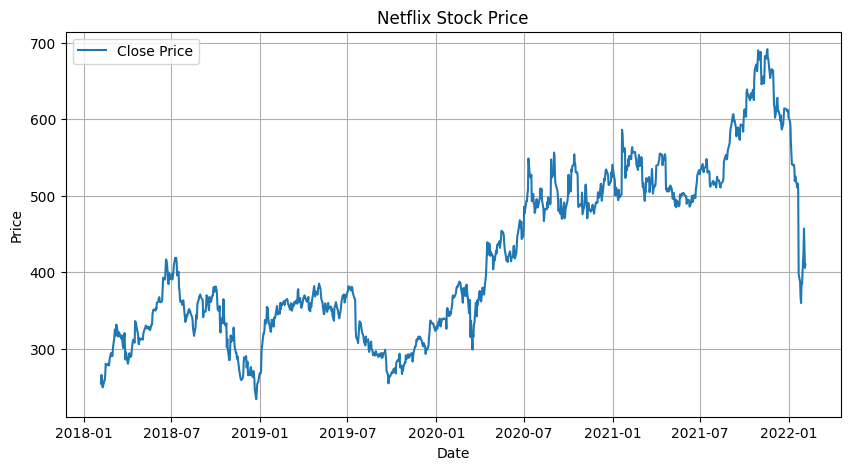

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Load your uploaded dataset
df = pd.read_csv("/content/NFLX.csv", parse_dates=['Date'])

# Preview the data
print(df.head())

# Plot closing prices
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Netflix Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['Close']].values
scaled_data = scaler.fit_transform(data)


In [6]:

def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0637
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0049
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0039
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0034
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0035
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0034
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0032
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0032
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0029
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0033


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


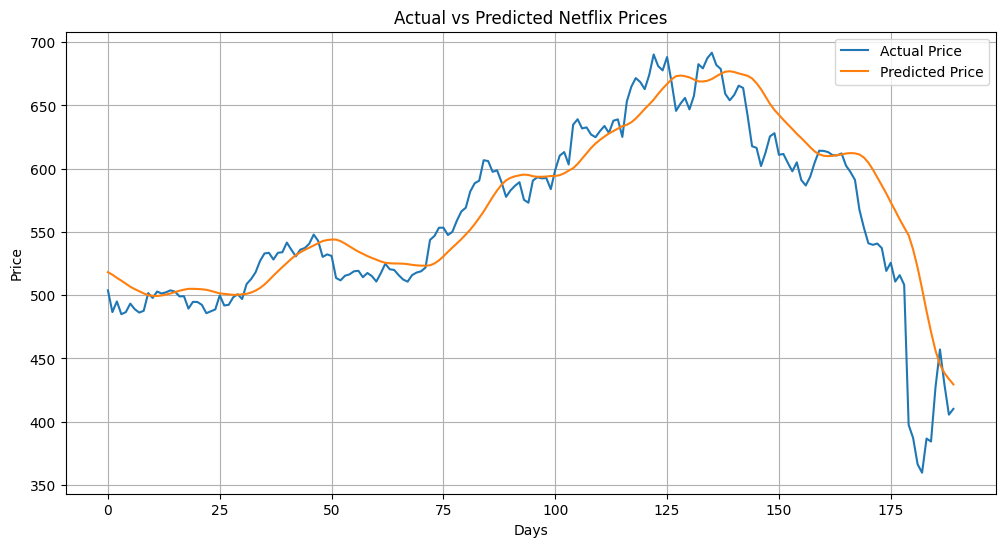

In [9]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("Actual vs Predicted Netflix Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()